## **Exploring the Connections Between Emissions, Farming, and Population Growth (1990–2020)**

Over the years, human activities and the environment have been closely linked, shaping the world we know today. Farming practices like growing rice or burning leftover crops release greenhouse gases, fueling global warming. Fires in grasslands and forests add even more to the mix, disrupting ecosystems and affecting the air we breathe. Industries and the energy needed to run farms further increase the strain on the planet.

At the same time, as cities expand and rural communities grow, the demand for food, land, and resources rises, driving up emissions and transforming landscapes. With the planet warming and weather patterns changing, it’s more important than ever to understand how all these pieces connect. From planting crops to transporting food, every action leaves its mark, shaping not just the environment today but also the future we pass on to the next generation.

<div style="text-align: center;">
    <img src="agri_image.png" width="400">
</div>


# Table of Contents
1. [Introduction](#1.Introduction)

   1.1. [Problem Statement](#1.1.Problem-Statement)  
   1.2. [Objectives](#1.2.Objectives)  
2. [Importing Libraries](#2.Importing-Libraries)  
3. [Importing The Dataset](#3.Importing-The-Dataset)    
4. [Data Preprocessing](#4.Data-Preprocessing)  
5. [Exploratory Data Analysis (EDA)](#5.Exploratory-Data-Analysis-(EDA))
6. [MultiLinear Regression](#6.Multilinear-Regression)
7. [Ridge Regression](#7.Ridge-Regularisation)  
8. [Decision Trees](#8.Decision-Trees)
9. [Random Forests](#9.Random-Forest)
10. [Conclusion](#10.Conclusion)



### **1.Introduction**

#### *1.1.Problem Statement*


Emissions from the agri-food sector play a crucial role in climate change, as they represent a significant share of global annual emissions

With the use of agricultural emissions and other environmental variables, can a regression model be used to forecast temperature variances?

#### *1.2.Objectives*

predict the effect of CO2 emissions on climate change from the agri-food sector

### **2.Importing Libraries**

In [1]:
# import all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


### **3.Importing The Dataset**

In [2]:
# importing the dataset
df = pd.read_csv("co2_emissions_from_agri.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


### **4.Data Preprocessing**

The data cleaning includes: 

    1. Handling missing values 
    2. Removing any duplicates, in rows
    3. Checking of data types for each column
    4. Filtering the observations with less entries for each Area 

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

The data type for each column is well represented, therefore there is no need to change the data type 

In [5]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print(missing_values)

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


Handling missing values using median(suitable for skewed distributions)

In [6]:
#Handling missing values 
missing_values = df.isnull().any(axis = 1)
df['Savanna fires'] = df['Savanna fires'].fillna(df['Savanna fires'].median())
df['Forest fires'] = df['Forest fires'].fillna(df['Forest fires'].median())
df['Crop Residues'] = df['Crop Residues'].fillna(df['Crop Residues'].median())
df['Forestland'] = df['Forestland'].fillna(df['Forestland'].median())
df['Net Forest conversion'] = df['Net Forest conversion'].fillna(df['Net Forest conversion'].median())
df['Food Household Consumption'] = df['Food Household Consumption'].fillna(df['Food Household Consumption'].median())
df['IPPU'] = df['IPPU'].fillna(df['IPPU'].median())
df['Fires in organic soils'] = df['Fires in organic soils'].fillna(df['Fires in organic soils'].median())
df['On-farm energy use'] = df['On-farm energy use'].fillna(df['On-farm energy use'].median())
df['Manure applied to Soils'] = df['Manure applied to Soils'].fillna(df['Manure applied to Soils'].median())
df['Fires in humid tropical forests'] = df['Fires in humid tropical forests'].fillna(df['Fires in humid tropical forests'].median())
df['Manure Management'] = df['Manure Management'].fillna(df['Manure Management'].median())

In [7]:
# Create a copy of the DataFrame 'df' to avoid modifying the original DataFrame
df_cleaned = df.copy()

In [8]:
#removing any duplicates
df_cleaned.duplicated().sum()

0

There are no duplicates

In [9]:
#Check the summary of the dataset
df_cleaned.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,...,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1183.108924,907.034122,820.218691,4259.666673,3503.228636,333.418393,1939.581760,-16570.808969,1.636262e+04,...,1997.737270,1210.315532,653.577094,2615.342773,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5235.194053,3696.660308,3330.078734,17613.825187,15861.445678,1429.159367,5616.748808,79013.974879,9.761518e+04,...,7460.634391,22669.847760,3229.846962,11779.828918,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,25.360100,181.260800,0.000000,6.000000,27.958600,-2299.387200,0.000000e+00,...,52.707800,0.000000,0.000000,17.738200,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,108.361700,61.237200,264.718000,1536.640000,690.408800,116.325487,1207.000900,0.000000,3.830905e+03,...,883.170300,0.000000,6.941800,845.713100,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


Filtering out Countries with less entries to avoid bias

In [10]:
#Filtering out the countries with less entries
area_counts = df_cleaned['Area'].value_counts()
filtered_areas = area_counts[area_counts > 9].index
df_new = df_cleaned[df_cleaned['Area'].isin(filtered_areas)]
df_new

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,141.0963,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,141.0963,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,141.0963,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,141.0963,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,141.0963,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


### **5.Exploratory Data Analysis (EDA)**

#### Univariate analysis - Plotting distributions

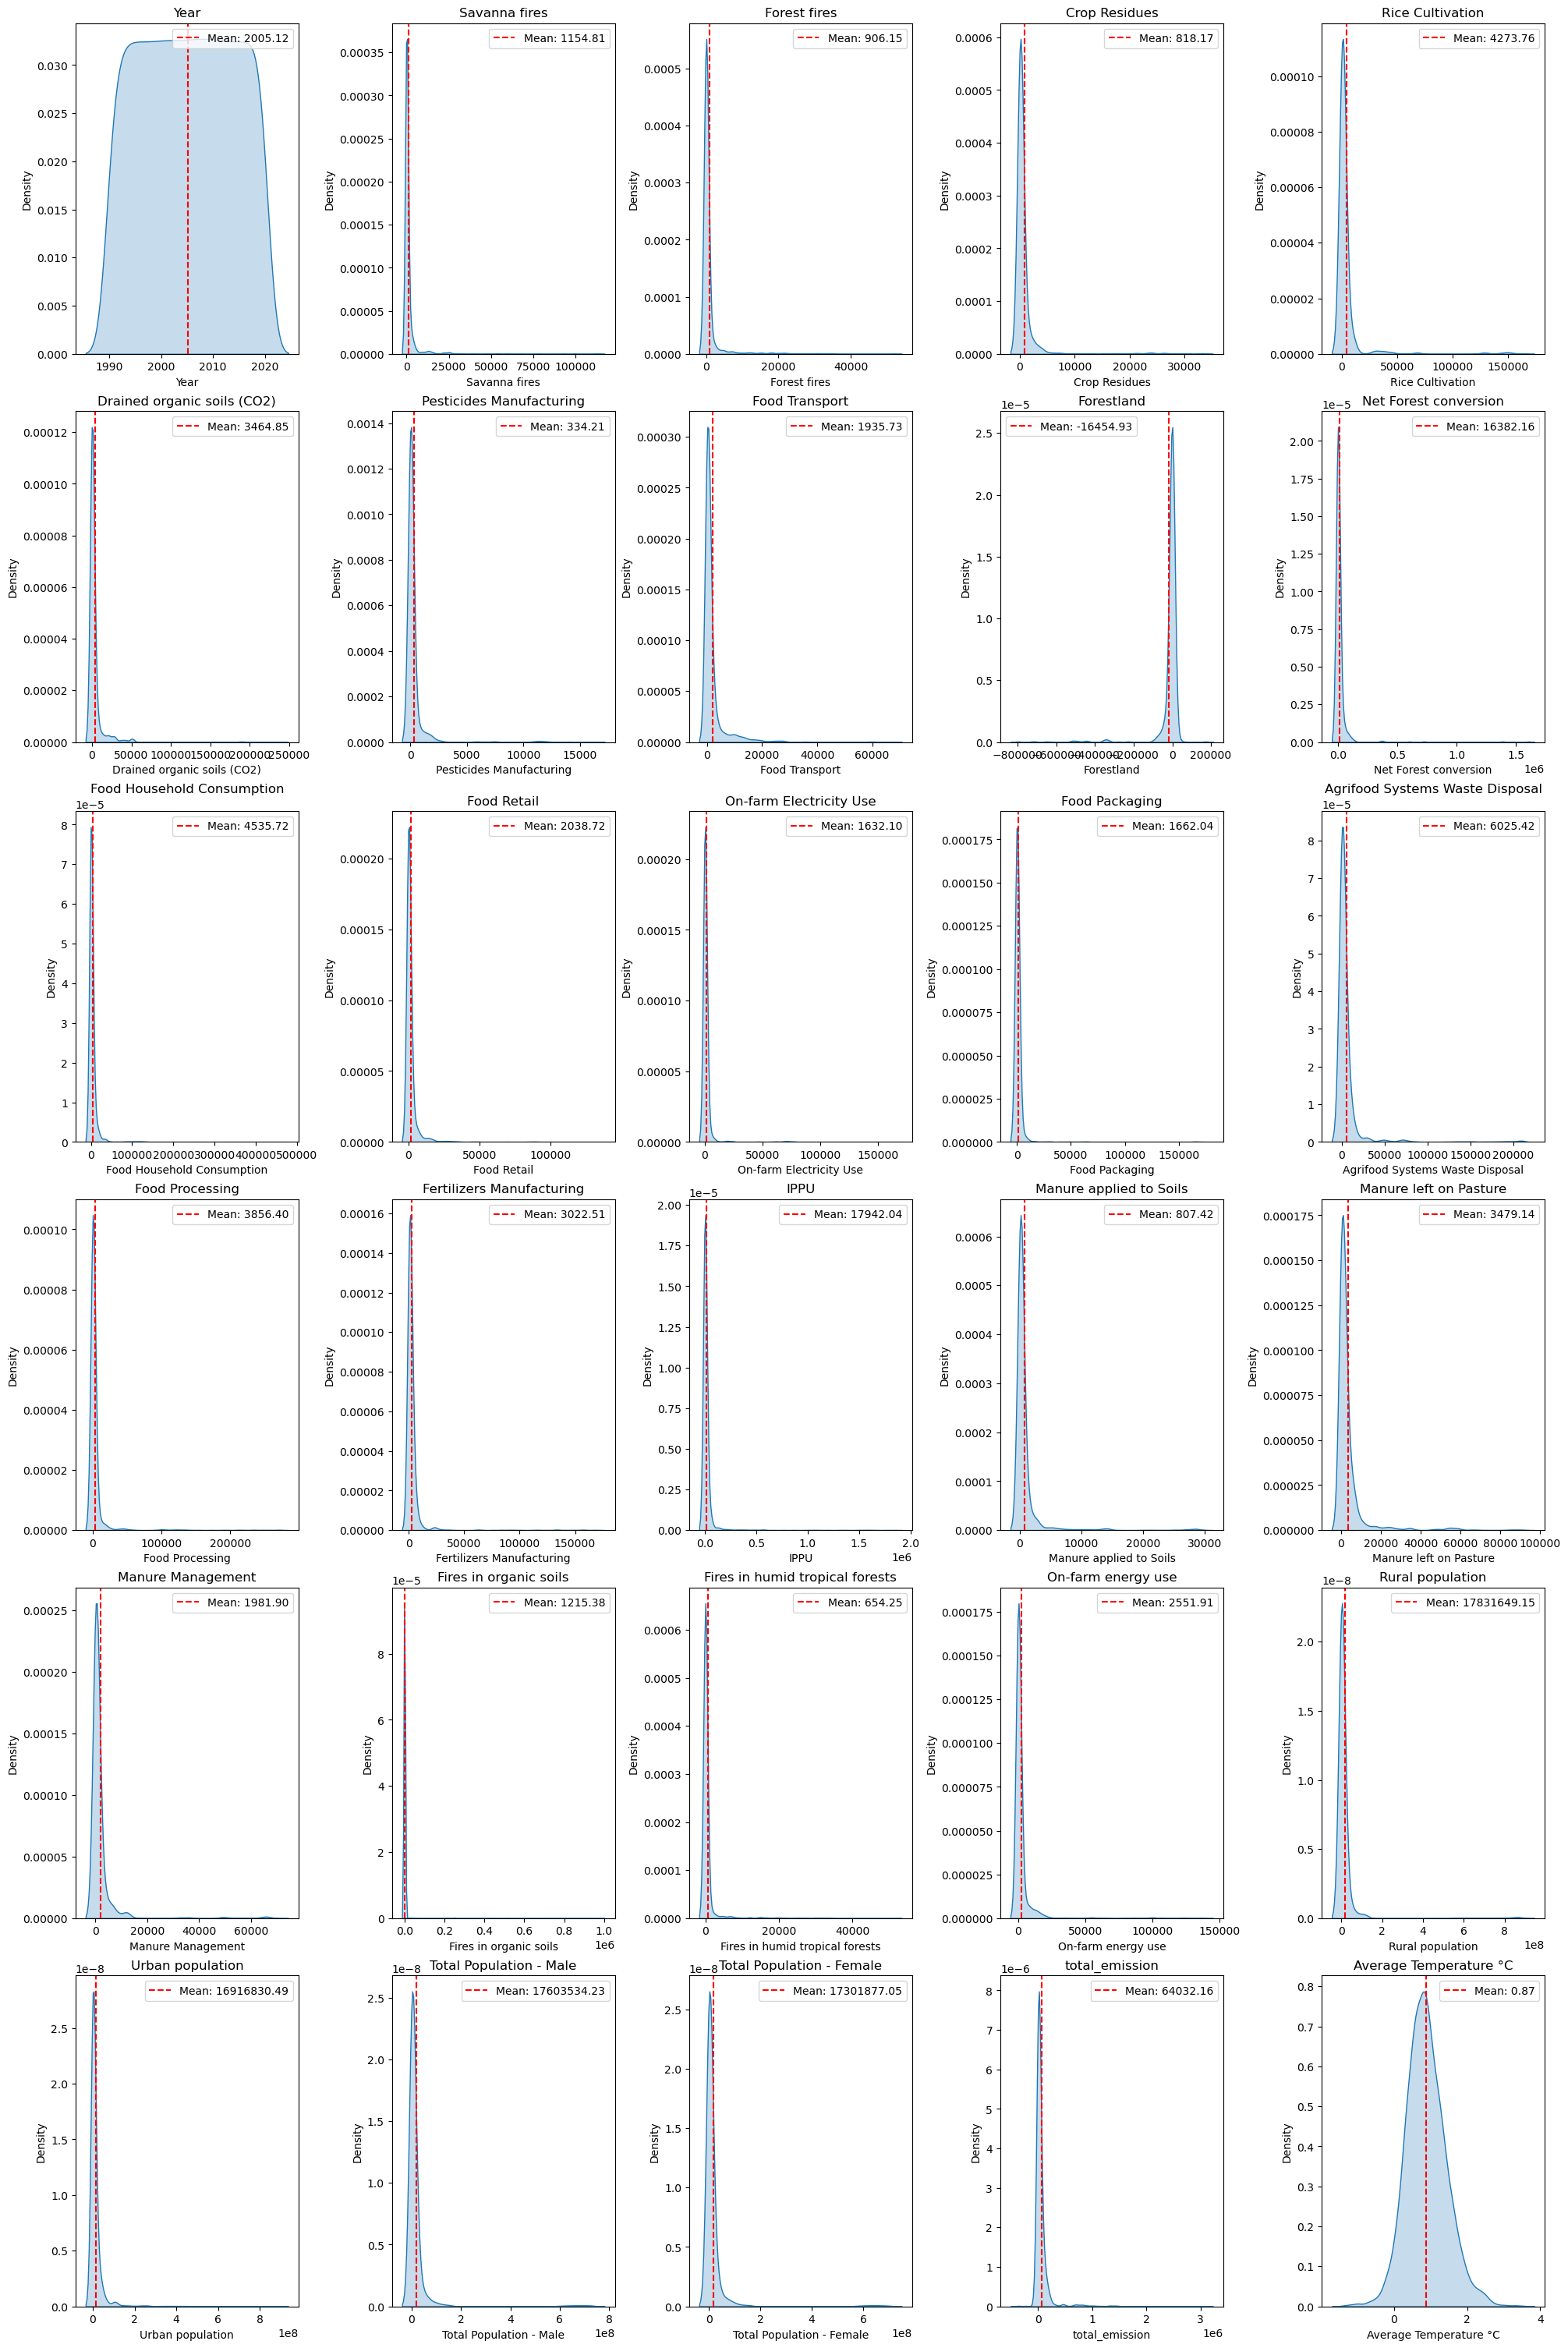

In [11]:
# Select numeric columns for plotting
numeric_columns = df_new.select_dtypes(include='number').columns

# Grid configuration for 5 plots per row
num_columns = len(numeric_columns)
rows = (num_columns + 4) // 5  # Calculate required rows
cols = 5  # Fixed number of columns (5 plots per row)

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows), constrained_layout=True)

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Plot KDE for each numeric column
for i, column in enumerate(numeric_columns):
    # Plot KDE
    sns.kdeplot(df_new[column], ax=axes[i], fill=True)
    
    # Add mean line
    mean_value = df_new[column].mean()
    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    
    # Set title and label
    axes[i].set_title(column)
    axes[i].legend()

# Turn off unused axes (those that don't correspond to a numeric column)
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Show the plots
plt.show()


#### Multivariate Analysis

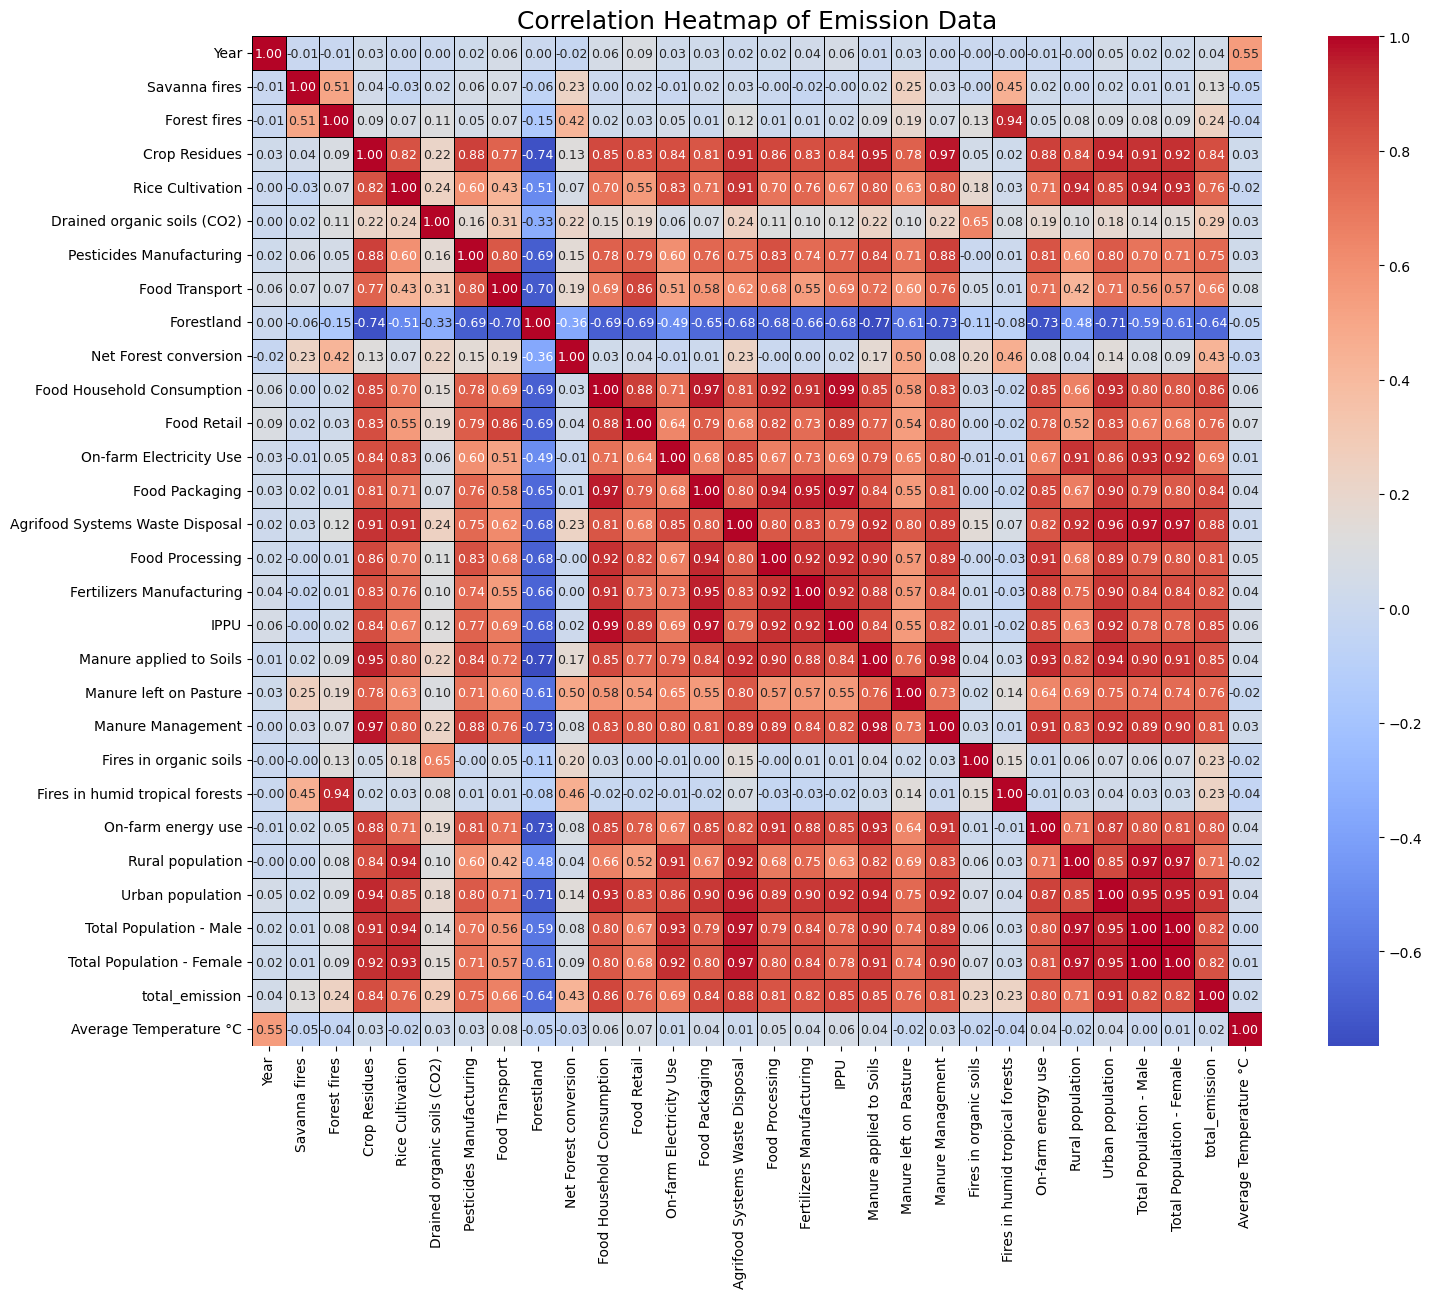

In [12]:
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the figure size for better clarity
plt.figure(figsize=(16, 13))

# Plot the heatmap without clustering
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            linewidths=0.5, linecolor='black', square=True, annot_kws={'size': 9})

# Adjust title and show plot
plt.title('Correlation Heatmap of Emission Data', fontsize=18)

# Adjust the layout for better spacing of the labels
plt.tight_layout()

plt.show()

Our target variable(Average Temperature C) correlates the most with the variable Year

#### Scatterplots for highest correlation with  Average Temperature

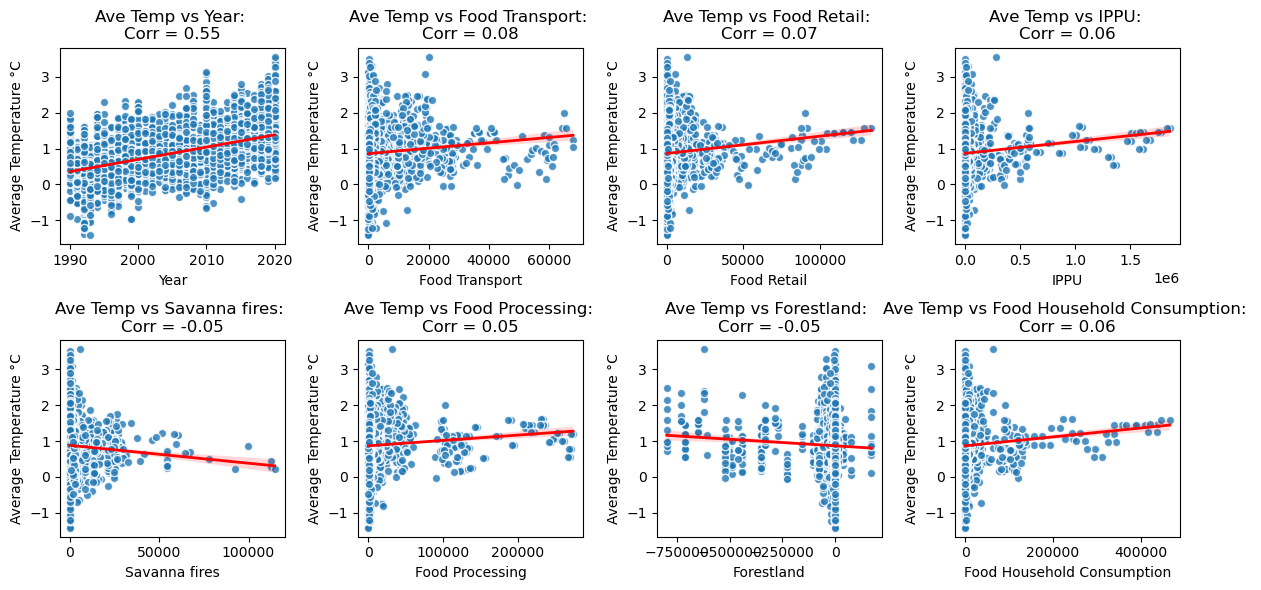

In [13]:
# Features to plot
features = ['Year', 'Food Transport', 'Food Retail', 'IPPU', 
            'Savanna fires', 'Food Processing', 'Forestland', 'Food Household Consumption']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Loop through features and plot
for ax, feature in zip(axes.ravel(), features):
    # Calculate correlation
    correlation = df_numeric[feature].corr(df_numeric['Average Temperature °C'])
    
    # Create scatter plot with regression line
    sns.regplot(x=df_numeric[feature], y=df_numeric['Average Temperature °C'], ax=ax,
                scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
    
    # Set plot title
    ax.set_title(f'Ave Temp vs {feature}: \nCorr = {correlation:.2f}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


C:\Users\lebo\AppData\Local\Temp\ipykernel_13452\144591429.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cols, y=means, palette=colors, ax=ax)  # Now 'x' is for the features and 'y' for the means
C:\Users\lebo\AppData\Local\Temp\ipykernel_13452\144591429.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=cols, y=means, palette=colors, ax=ax)  # Now 'x' is for the features and 'y' for the means


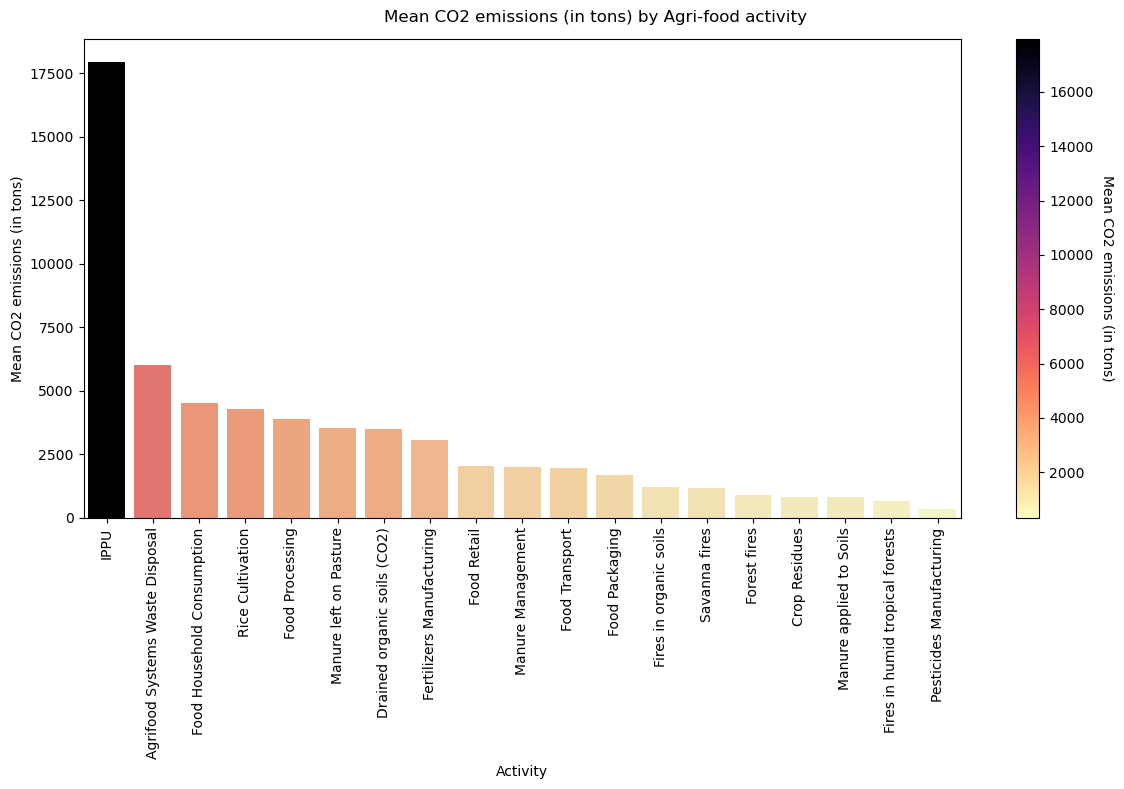

In [14]:


# Filter the dataset
temp = df.iloc[:, 2:-7].copy()  # Exclude the first two columns (Area and Year) and the last seven columns
delete_list = ['Forestland', 'Net Forest conversion', 'On-farm Electricity Use']  # Exclude non-relevant features
temp = temp.drop(delete_list, axis=1)

# Calculate the mean annual values and sort in descending order
means = temp.mean()  
means.sort_values(ascending=False, inplace=True)
cols = means.index  # Extract the feature names (columns)

# Create gradient colors based on the mean values
norm = Normalize(vmin=means.min(), vmax=means.max())
cmap = plt.cm.magma_r  # You can change the colormap if you like
colors = cmap(norm(means))

# Create the vertical barplot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size for vertical bars
sns.barplot(x=cols, y=means, palette=colors, ax=ax)  # Now 'x' is for the features and 'y' for the means

# Add colorbar for the gradient
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Mean CO2 emissions (in tons)', rotation=270, labelpad=15)

# Add labels and titles
ax.set_xlabel("Activity")
ax.set_ylabel("Mean CO2 emissions (in tons)")
fig.suptitle('Mean CO2 emissions (in tons) by Agri-food activity')

# Improve layout and aesthetics
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


### **6.Multilinear Regression**

#### *6.1.Using least squares of regression*

In [15]:
# Drop the 'Area' column from the dataset
model_df = df_new.drop('Area', axis=1)

# Define the independent and dependent variables
independent_vars = ['Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female','total_emission'
       ]
dependent_var = ['Average Temperature °C']

# Prepare the data for modeling
X = model_df[independent_vars]  # Select the independent variables
y = model_df[dependent_var]  # Select the dependent variable


X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=42)
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

first_model = sm.OLS(y_train, X_train).fit()

# Print the summary of the second OLS model's results
print(first_model.summary())

y_test_pred = first_model.predict(X_test)
y_train_pred = first_model.predict(X_train)

print()
print('Training metrics')
print('MSE:', mean_squared_error(y_train,y_train_pred))
print('MAE:', mean_absolute_error(y_train,y_train_pred))
print()
print('Test metrics')
print('MSE:', mean_squared_error(y_test,y_test_pred))
print('MAE:', mean_absolute_error(y_test,y_test_pred))



                              OLS Regression Results                              
Dep. Variable:     Average Temperature °C   R-squared:                       0.327
Model:                                OLS   Adj. R-squared:                  0.323
Method:                     Least Squares   F-statistic:                     92.36
Date:                    Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                            14:16:16   Log-Likelihood:                -3527.3
No. Observations:                    5548   AIC:                             7115.
Df Residuals:                        5518   BIC:                             7313.
Df Model:                              29                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

- **Low R-squared (0.326):** This means that the model explains only about 32.6% of the variation in the average temperature. In other words, the model doesn't fully capture all the factors that influence temperature, and there are other factors at play that we haven't considered yet.

- **F-statistic (92.15) with p-value 0.00:** This tells us that the model as a whole is statistically significant. In simpler terms, the relationship between the variables in the model and temperature is unlikely to be due to chance.

- **Multicollinearity:** The condition number (3.59e+10) is very high, which suggests that some of the input factors in the model might be strongly related to each other. This can cause problems when trying to get accurate results for each individual factor's effect on temperature.

- **MSE and MAE:** These values are close for both the training data and the test data, which means the model is performing consistently. It's doing about the same job predicting temperature on both the data it was trained on and the new data it was tested on.

Overall, the model gives us some useful insights but still has room for improvement, particularly in capturing more factors that affect temperature and addressing the multicollinearity issue.

### Implenting vif method to address high multicollinearity features

In [16]:
# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                           Variable            VIF
28                   total_emission  433174.425526
17                             IPPU   88508.705825
9             Net Forest conversion   75659.153750
8                        Forestland   49471.042148
27        Total Population - Female   10972.369343
26          Total Population - Male   10138.678430
10       Food Household Consumption    5021.677389
14  Agrifood Systems Waste Disposal    4153.651867
21           Fires in organic soils    3973.650943
15                  Food Processing    3152.852713
4                  Rice Cultivation    2466.285229
5       Drained organic soils (CO2)    2005.630965
24                 Rural population    1249.957210
16        Fertilizers Manufacturing    1090.894264
13                   Food Packaging    1083.600122
23               On-farm energy use    1037.233895
25                 Urban population     898.656956
19           Manure left on Pasture     706.471735
12          On-farm Electricity

### After removing features with a high vif score

In [17]:
# Define the independent and dependent variables
independent_vars = ['Year', 'Savanna fires', 'Forest fires',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion',
       'On-farm Electricity Use',
       'Food Processing',
       'Manure left on Pasture', 'Fires in organic soils',
       ]
dependent_var = ['Average Temperature °C']

# Prepare the data for modeling
X = model_df[independent_vars]  # Select the independent variables
y = model_df[dependent_var]  # Select the dependent variable


# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                       Variable       VIF
11       Manure left on Pasture  6.697925
5      Pesticides Manufacturing  6.479242
3              Rice Cultivation  5.864129
10              Food Processing  5.667904
9       On-farm Electricity Use  4.913149
6                Food Transport  4.329735
7                    Forestland  3.149174
8         Net Forest conversion  2.874556
4   Drained organic soils (CO2)  2.585991
12       Fires in organic soils  1.944195
2                  Forest fires  1.844541
1                 Savanna fires  1.722685
0                          Year  1.343206


In [18]:
# Define the independent and dependent variables
independent_vars = ['Year', 'Savanna fires', 'Forest fires',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion',
       'On-farm Electricity Use',
       'Food Processing',
       'Manure left on Pasture', 'Fires in organic soils',
       ]
dependent_var = ['Average Temperature °C']

# Prepare the data for modeling
X = model_df[independent_vars]  # Select the independent variables
y = model_df[dependent_var]  # Select the dependent variable

y = model_df[dependent_var]  # Select the dependent variable

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=42)

# Add constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS model
second_ols_model = sm.OLS(y_train, X_train).fit()

# Print the summary of the second OLS model's results
print(second_ols_model.summary())

                              OLS Regression Results                              
Dep. Variable:     Average Temperature °C   R-squared:                       0.310
Model:                                OLS   Adj. R-squared:                  0.309
Method:                     Least Squares   F-statistic:                     191.4
Date:                    Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                            14:16:33   Log-Likelihood:                -3595.0
No. Observations:                    5548   AIC:                             7218.
Df Residuals:                        5534   BIC:                             7311.
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [19]:
y_test_pred = second_ols_model.predict(X_test)
y_train_pred = second_ols_model.predict(X_train)

print()
print('Training metrics')
print('R2:', r2_score(y_train,y_train_pred))
print('MSE:', mean_squared_error(y_train,y_train_pred))
print('MAE:', mean_absolute_error(y_train,y_train_pred))
print()
print('Test metrics')
print('R2:', r2_score(y_test,y_test_pred))
print('MSE:', mean_squared_error(y_test,y_test_pred))
print('MAE:', mean_absolute_error(y_test,y_test_pred))


Training metrics
R2: 0.31013851785388413
MSE: 0.21397164184112502
MAE: 0.35050622009036747

Test metrics
R2: 0.3247856360298331
MSE: 0.20626106973053163
MAE: 0.34282376343244836


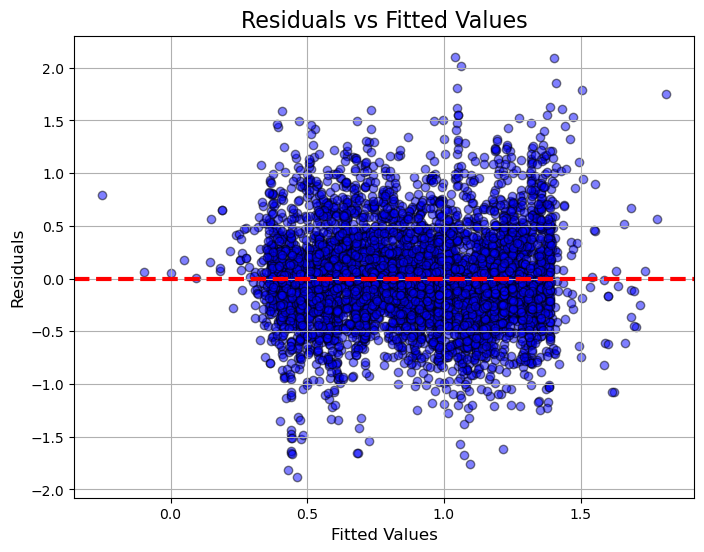

In [90]:
# Get the predicted (fitted) values
fitted_values = second_ols_model.fittedvalues

# Get the residuals
residuals = second_ols_model.resid

# Plotting the residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, color='blue', edgecolor='k', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=3)  # Line at y=0
plt.title('Residuals vs Fitted Values', fontsize=16)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()

    - there appears to be a slight increase in the spread of points towards the higher fitted values, indicating potential heteroscedasticity.

- **R-squared (0.310):** R_Squared has slight decrease compared to the initial model indicating some of the variation in the average tempreature could be explained by the removed features.

- **F-statistic with p-value 0.00:** F-statistic of 191.4 is likely explaining temperature variation more effectively than the previous model, which had a lower F-statistic of 92.15.

- **Multicollinearity:** while the condition number is still large(2.46e+07) indicating multicollinearity,it has improved compared to the first models condition number(3.59e+10.)

While the new model shows an increase in both training and test errors (MSE and MAE), the overall difference is relatively small. This might indicate that the model changes (e.g., reducing the number of predictors or adding new variables) didn't substantially improve prediction accuracy, even though the F-statistic increased, suggesting better overall model significance, Therefore, it would be beneficial to try other models to potentially achieve a better fit and enhance overall performance.


### **7.Ridge Regularisation**


Train Metrics
Intercept: 0.8791582913293899
Ridge R² (Train): 0.32617590700149635
Ridge MSE (Train): 0.2089973874790982
Ridge MAE (Train): 0.345748065924551

Test Metrics
Ridge R² (Test): 0.33667362836420156
Ridge MSE (Test): 0.20262958594304584
Ridge MAE (Test): 0.345748065924551


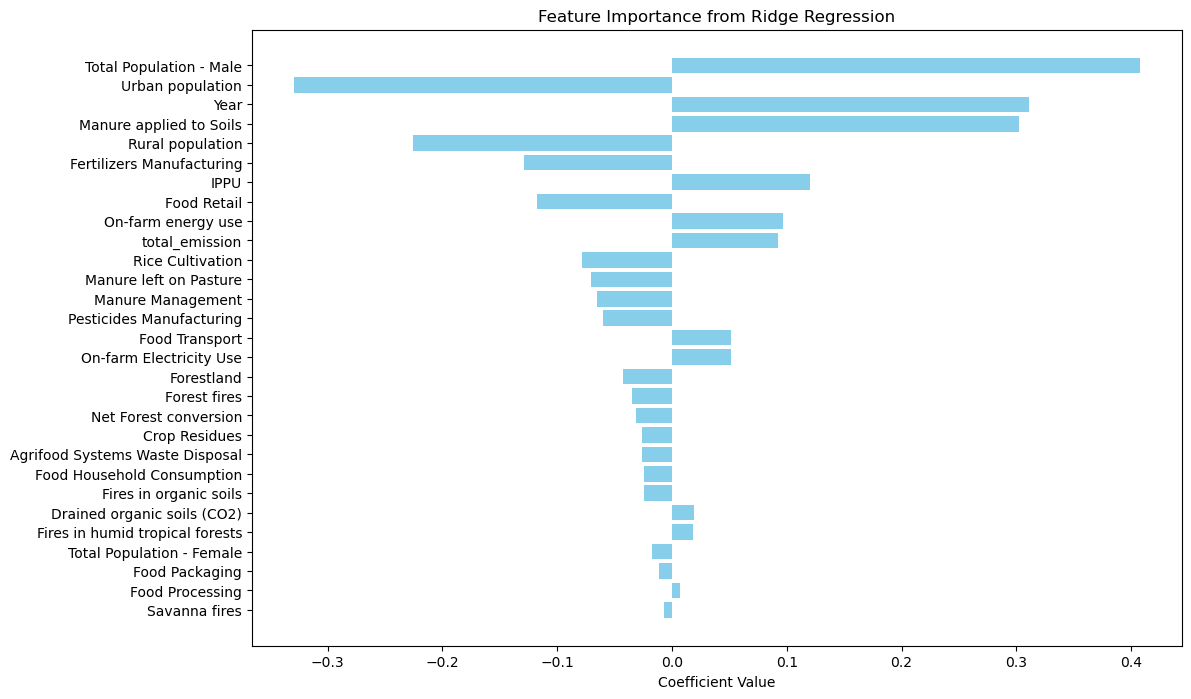

In [20]:


# Define features and target
independent_vars = [
    'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
    'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Food Transport', 'Forestland',
    'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
    'On-farm Electricity Use', 'Food Packaging',
    'Agrifood Systems Waste Disposal', 'Food Processing',
    'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
    'Fires in humid tropical forests', 'On-farm energy use',
    'Rural population', 'Urban population', 'Total Population - Male',
    'Total Population - Female', 'total_emission'
]
dependent_var = ['Average Temperature °C']

# Prepare data
X = model_df[independent_vars]
y = model_df[dependent_var]

# Standardize features
scaler = StandardScaler()
X_standardised = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_standardised, y, test_size=0.2, random_state=42)

# Ridge model training
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Extract coefficients
coefficients = pd.DataFrame({
    'Feature': independent_vars,
    'Coefficient': ridge.coef_.flatten()
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print model metrics
print('Train Metrics')
print("Intercept:", ridge.intercept_[0])
print("Ridge R² (Train):", r2_score(y_train, ridge.predict(X_train)))
print("Ridge MSE (Train):", mean_squared_error(y_train, ridge.predict(X_train)))
print("Ridge MAE (Train):", mean_absolute_error(y_train, ridge.predict(X_train)))
print()
print('Test Metrics')
print("Ridge R² (Test):", r2_score(y_test, ridge.predict(X_test)))
print("Ridge MSE (Test):", mean_squared_error(y_test, ridge.predict(X_test)))
print("Ridge MAE (Test):", mean_absolute_error(y_train, ridge.predict(X_train)))

# Visualize Feature Importance
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importance from Ridge Regression")
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


The model explains around 33% of the data's variance, both in training and testing. The average prediction error is about 0.35 units, and the squared error is around 0.20. These results suggest the model has moderate performance but could be improved for more accurate predictions.

### **8.Decision Trees**

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Features and target
X = model_df.drop('Average Temperature °C', axis=1)
y = model_df['Average Temperature °C']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.5f}')
print(f'R² Score: {r2:.5f}')

Mean Squared Error: 0.22846
R² Score: 0.25211


-An MSE of 0.22846 indicates that, on average, the squared prediction error is approximately 0.23 °C². Lower values are better, but this alone doesn't indicate how well the model performs. 

-An R² score of 0.25211 means that the model explains only about 25% of the variability in average temperature increases. This suggests the model may not be very effective, possibly due to underfitting, inefficient feature selection or data quality (Noise or non-linear relationships might be affecting the model's performance.)

Using only the 8 most correlated features in an attempt to improve the model, the following results are achieved [Mean Squared Error: 0.25885, R² Score: 0.15264] indicating a decline in model performance. Similar changes are observes when z-score scaling is implemented.

#### Manual tuning of hyperparametes can be executed for better model results

In [22]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

# Initialize model
model = DecisionTreeRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'splitter': 'best'}
Best R² Score: 0.46342674219289715


Most of these options chosen worsen the model as R² decreases. A better solution to improve predictions might be to use different models, particularly other non-linear models. 

#### Visualising model output

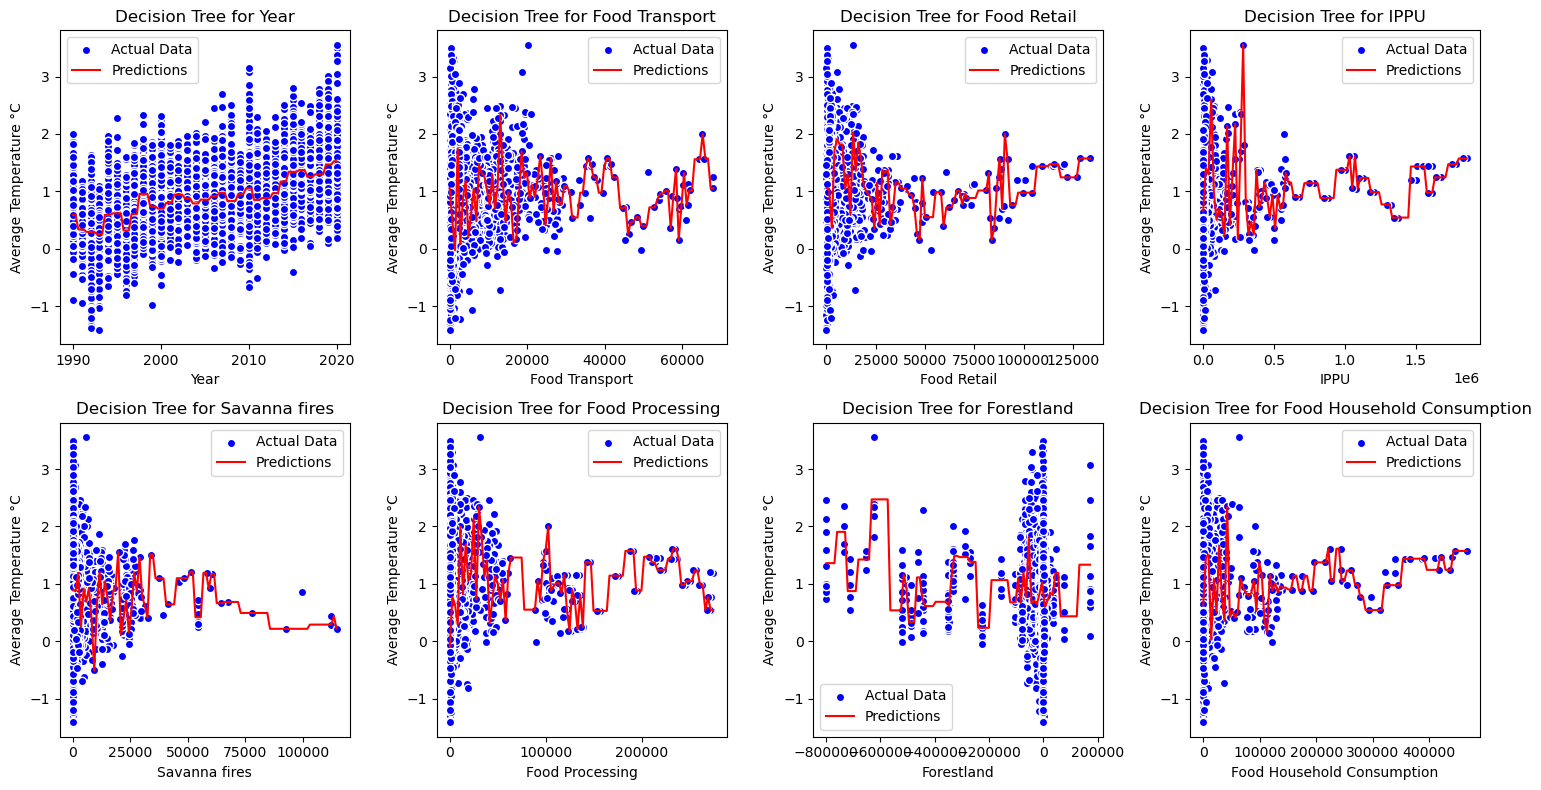

In [23]:
# Features to visualize
features = ['Year', 'Food Transport', 'Food Retail', 'IPPU', 
            'Savanna fires', 'Food Processing', 'Forestland', 'Food Household Consumption']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Loop through features and create subplots
for ax, feature in zip(axes.ravel(), features):
    # Extract the specific feature and target
    X_feature = X[[feature]]
    y_target = y
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)
    
    # Train the model
    regr_tree = DecisionTreeRegressor(random_state=42)
    regr_tree.fit(X_train, y_train)
    
    # Generate prediction points
    x_domain = np.linspace(X_feature.min().values[0], X_feature.max().values[0], 100).reshape(-1, 1)
    x_domain_df = pd.DataFrame(x_domain, columns=[feature])
    
    # Predict y-values
    y_predictions = regr_tree.predict(x_domain_df)
    
    # Plot actual data and predictions
    ax.scatter(X_feature, y_target, label="Actual Data", color="blue", edgecolor='white')
    ax.plot(x_domain, y_predictions, color="red", label="Predictions")
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Temperature °C")
    ax.set_title(f'Decision Tree for {feature}')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### **9.Random Forest**

Fold R² Score: 0.58760, MAE: 0.26324, MSE: 0.13304
Fold R² Score: 0.57990, MAE: 0.25618, MSE: 0.12188
Fold R² Score: 0.57224, MAE: 0.26989, MSE: 0.13487

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}
Best Model R² Score: 0.58760
Best Model MAE: 0.25618
Best Model MSE: 0.12188


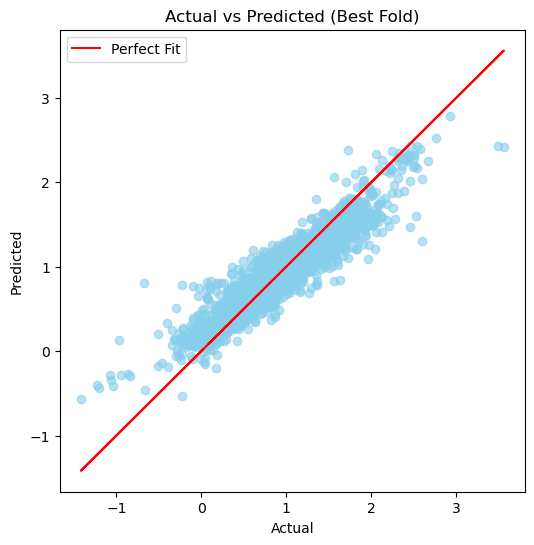

In [24]:


def sklearn_kfold_split(data, K):
    kfold = KFold(n_splits=K, shuffle=True, random_state=42)
    return list(kfold.split(data))

# Split data into features (X) and target (y)
X = model_df.drop(columns=["Average Temperature °C"])
y = model_df["Average Temperature °C"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize RandomForest model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define Hyperparameter Search Space
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Apply K-Fold Cross-Validation
kf_splits = sklearn_kfold_split(X_scaled, K=3)

# Perform K-Fold Cross-Validation with RandomizedSearchCV
best_models = []
best_scores = []
best_mae = []
best_mse = []

for train_idx, test_idx in kf_splits:
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    random_search = RandomizedSearchCV(
        estimator=rf_model, 
        param_distributions=param_grid, 
        n_iter=5,  # Fewer random combinations
        cv=2,  # Inner cross-validation
        n_jobs=-1, 
        random_state=42, 
        scoring='neg_mean_squared_error'
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_models.append(best_model)

    # Evaluate current fold
    y_pred = best_model.predict(X_test)
    
    # Calculate R², MAE, and MSE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    best_scores.append(r2)
    best_mae.append(mae)
    best_mse.append(mse)

    print(f"Fold R² Score: {r2:.5f}, MAE: {mae:.5f}, MSE: {mse:.5f}")

# Final Evaluation
final_model = best_models[np.argmax(best_scores)]
y_pred_final = final_model.predict(X_test)

print("\nBest Parameters:", random_search.best_params_)
print(f"Best Model R² Score: {max(best_scores):.5f}")
print(f"Best Model MAE: {min(best_mae):.5f}")
print(f"Best Model MSE: {min(best_mse):.5f}")

# Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.title("Actual vs Predicted (Best Fold)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(y_test, y_pred_final, alpha=0.6, color='skyblue')
plt.plot(y_test, y_test, 'r', label="Perfect Fit")
plt.legend()
plt.show()


Performance Metrics:

R² Score: The model explains 59% of the variation in the data, indicating a decent fit, but there is still room for improvement.
MAE (Mean Absolute Error): On average, the model's predictions are off by about 0.256.
MSE (Mean Squared Error): The average squared difference between the actual and predicted values is 0.12188, suggesting small errors.
In summary, the model performs well, with room for further refinement.

Hyperparameter Optimization:

    Grid Search with cross-validation (CV=5) was initially considered for hyperparameter tuning. However, it was time-intensive, so RandomizedSearchCV was adopted with reduced iterations (n_iter=5) for faster results.

Cross-Validation Approach:

    Instead of using a single train-test split, K-Fold Cross-Validation (K=3) was employed to ensure more reliable and stable performance estimates.
    The custom sklearn_kfold_split function provided manual control over the data split process, improving flexibility in handling the cross-validation.


Efficiency Considerations:

    Parallel Processing was enabled (n_jobs=-1) to speed up computations, particularly with grid and random searches.
    Reduced parameter combinations and early stopping within cross-validation helped balance accuracy and computational time.

### **10.Conclusion**


The Random Forest model emerged as the top performer, delivering the highest R², showcasing its superior ability to capture the underlying patterns in the data. 

The R² scores indicate that the model explains approximately 57% to 59% of the variance in the data for each fold. This is a decent result, showing that the model can capture the relationship between agricultural emissions and temperature to some extent, but there is still room for improvement. Best hyperparameter settings were chosen to balance model complexity and performance, with a reasonable focus on reducing overfitting by controlling the depth and number of samples per split/leaf. The model's R² score suggests that it does a moderately good job of predicting temperature changes based on the given features. However, there is still 41% of the variance that is unexplained, meaning that the model might be missing important factors or that the relationship between emissions and temperature is not fully captured by the current set of features. The model’s performance could potentially be improved with further tuning of hyperparameters or by exploring additional features (such as new emissions sources or demographic data). The chosen hyperparameters suggest a good balance between model complexity and accuracy, but adjustments could still lead to performance gains.